# Plot Bfactor

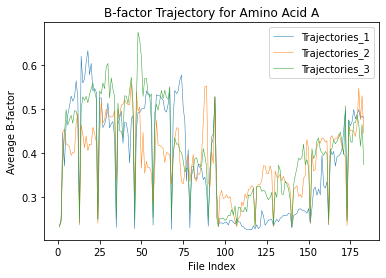

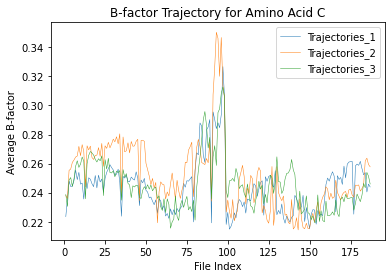

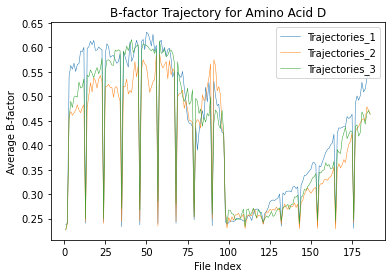

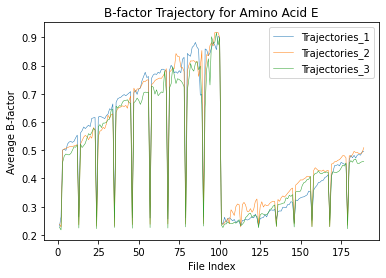

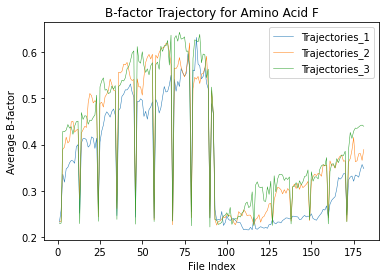

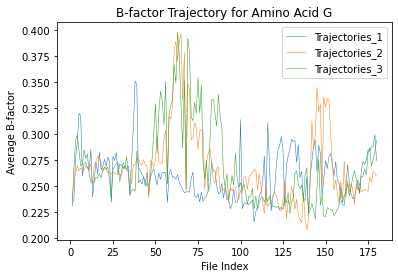

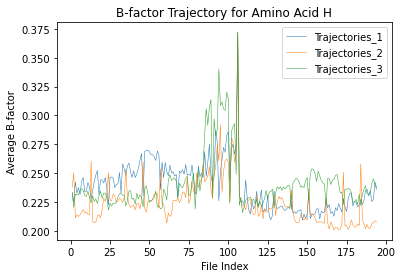

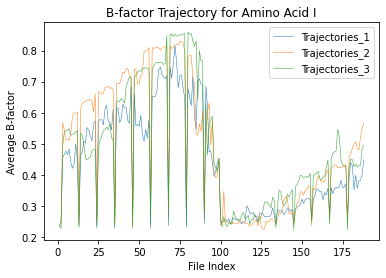

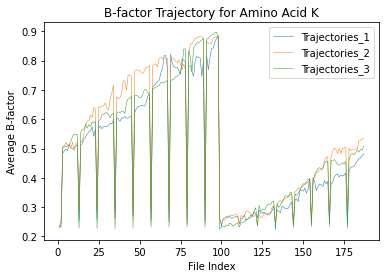

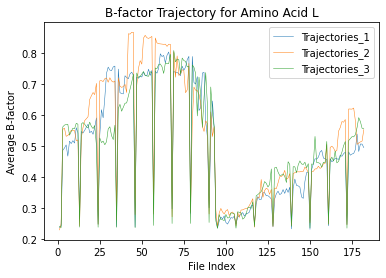

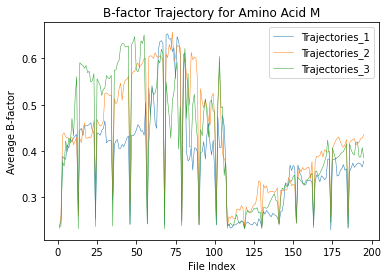

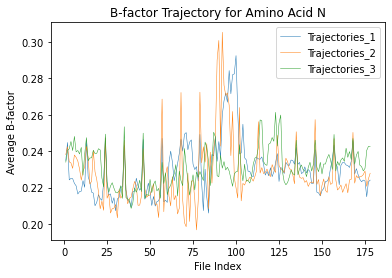

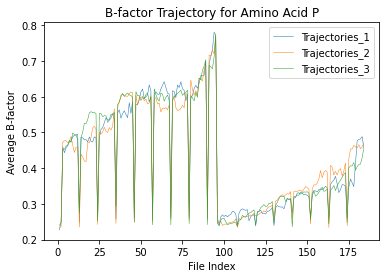

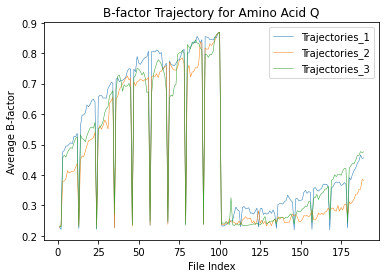

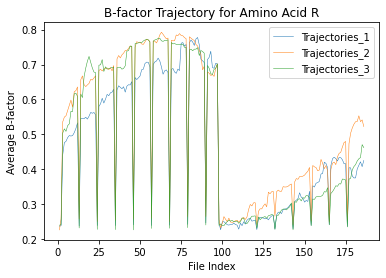

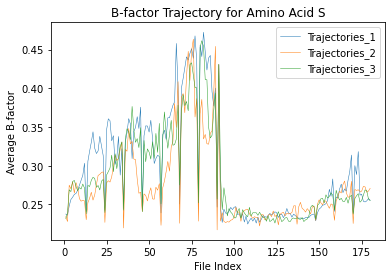

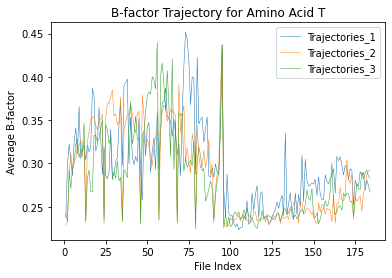

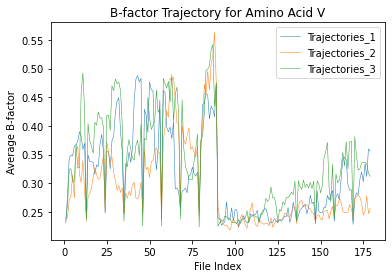

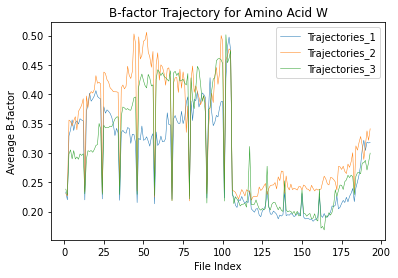

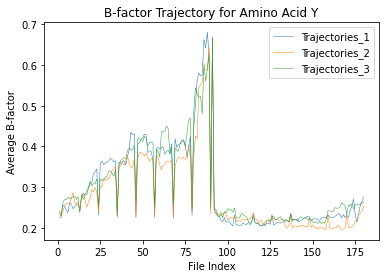

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)

    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectories(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        # Plot trajectories for each amino acid
        plt.figure()
        plt.title(f'B-factor Trajectory for Amino Acid {amino_acid}')
        plt.xlabel('File Index')
        plt.ylabel('Average B-factor')
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = []
            for pdb_file in pdb_files:
                average_b_factor = calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file))
                average_b_factors.append(average_b_factor)
            plt.plot(range(1, len(pdb_files) + 1), average_b_factors, label=f'Trajectories_{i}', linewidth=0.5)
        plt.legend()
        plt.show()

# Update the parent directory to the appropriate folder containing the trajectory subdirectories
parent_directory = 'ESM/output_esm'
analyze_trajectories(parent_directory)


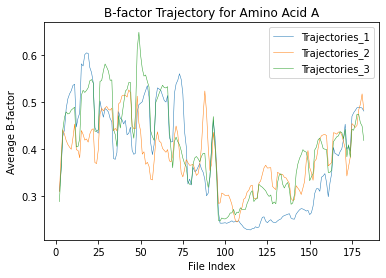

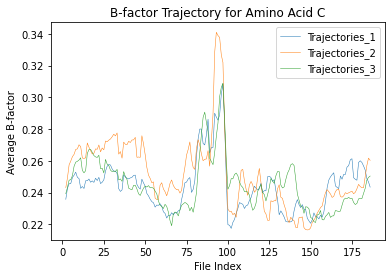

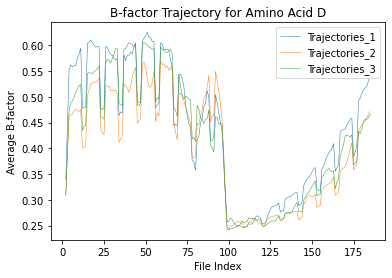

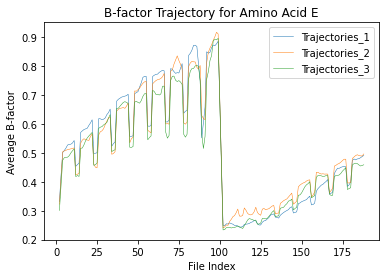

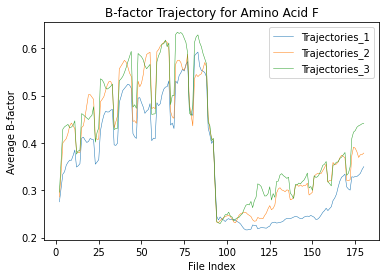

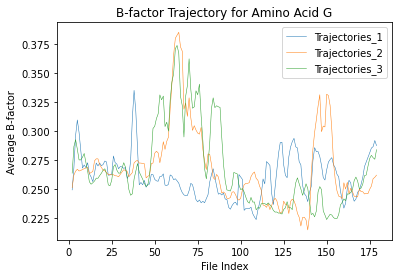

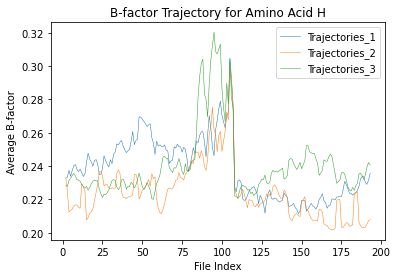

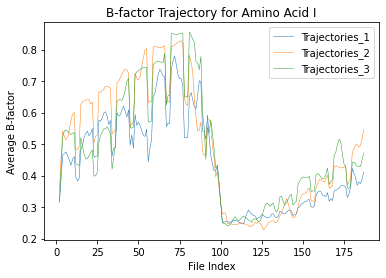

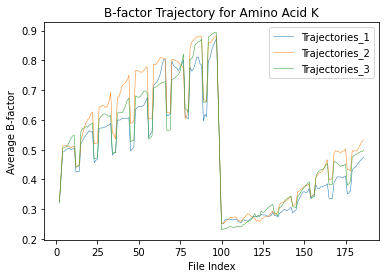

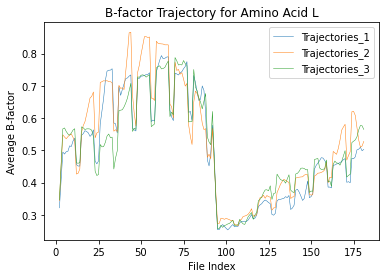

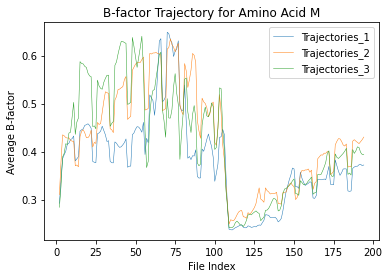

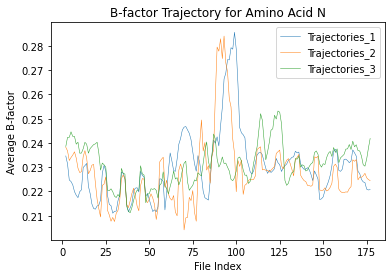

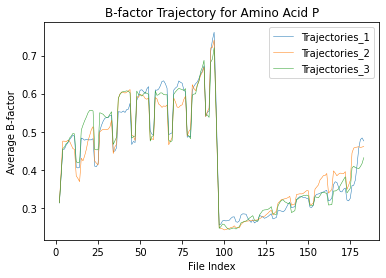

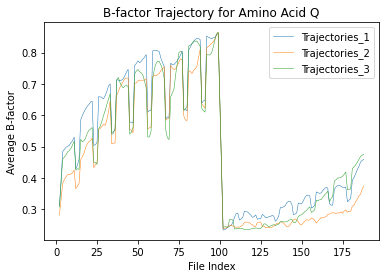

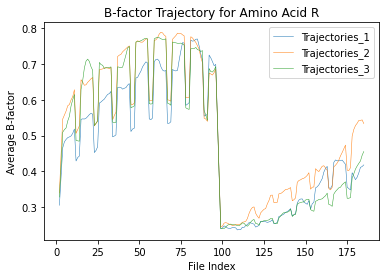

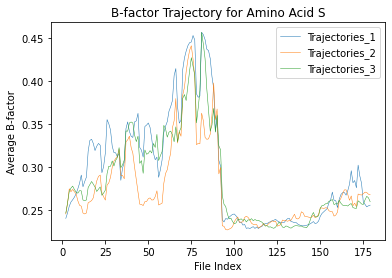

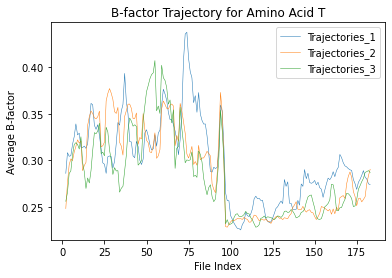

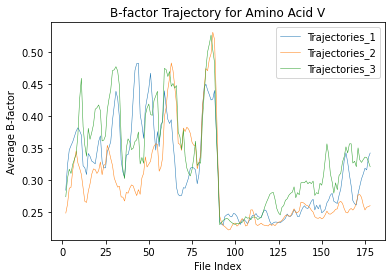

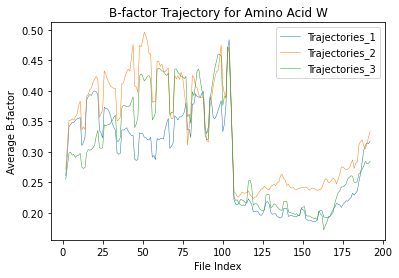

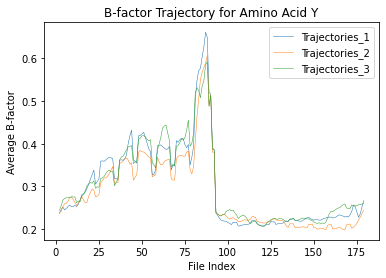

In [29]:
# bfactor smoothed
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectories(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        # Plot trajectories for each amino acid
        plt.figure()
        plt.title(f'B-factor Trajectory for Amino Acid {amino_acid}')
        plt.xlabel('File Index')
        plt.ylabel('Average B-factor')
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = [calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file)) for pdb_file in pdb_files]
            smoothed_factors = np.convolve(average_b_factors, np.ones(3)/3, mode='valid')
            plt.plot(range(2, len(pdb_files)), smoothed_factors, label=f'Trajectories_{i}', linewidth=0.5)
        plt.legend()
        plt.show()

parent_directory = 'ESM/output_esm'
analyze_trajectories(parent_directory)

# TEST

In [27]:
import os
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def calculate_and_save_average_b_factors(parent_directory):
    for i in range(1, 4):
        trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
        output_file = os.path.join(output_dir, f'average_b_factors_trajectories_{i}.txt')
        with open(output_file, 'w') as f:
            for pdb_file in os.listdir(trajectory_directory):
                if pdb_file.endswith(".pdb"):
                    average_b_factor = calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file))
                    f.write(f'{pdb_file}: {average_b_factor}\n')

# Set the parent directory where trajectory subdirectories are located
parent_directory = 'ESM/output_esm'
output_dir = 'ESM/bfactor'

# Calculate and save average B factors for each trajectory subdirectory
calculate_and_save_average_b_factors(parent_directory)


In [28]:
import os
from Bio.PDB import PDBParser
from tmtools.io import get_residue_data
from tmtools import tm_align

def calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure):
    parser = PDBParser(QUIET=True)
    tm_scores = []

    ref_structure = parser.get_structure('reference', reference_structure)
    ref_chain = next(ref_structure.get_chains())
    ref_coords, ref_seq = get_residue_data(ref_chain)

    for pdb_file in sorted(os.listdir(trajectory_directory)):
        if pdb_file.endswith(".pdb"):
            pdb_path = os.path.join(trajectory_directory, pdb_file)
            structure = parser.get_structure('PDB', pdb_path)
            chain = next(structure.get_chains())
            coords, seq = get_residue_data(chain)
            tm_result = tm_align(ref_coords, coords, ref_seq, seq)
            tm_score = tm_result.tm_norm_chain1
            tm_scores.append((pdb_file, tm_score))

    return tm_scores

def calculate_and_save_tm_scores(trajectory_directories, reference_structure):
    for i, trajectory_directory in enumerate(trajectory_directories, start=1):
        output_file = f'tm_scores_trajectories_{i}.txt'
        with open(output_file, 'w') as f:
            tm_scores = calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure)
            for pdb_file, tm_score in tm_scores:
                f.write(f'{pdb_file}: {tm_score}\n')

# Set the list of trajectory directories and reference structure
trajectory_directories = ['ESM/output_esm/trajectories_1/', 'ESM/output_esm/trajectories_2/', 'ESM/output_esm/trajectories_3/']
reference_structure = 'ESM/tmscore/ACE2.pdb'
output_dir = 'ESM/tmscore'

# Calculate and save TM scores for each trajectory subdirectory
calculate_and_save_tm_scores(trajectory_directories, reference_structure)


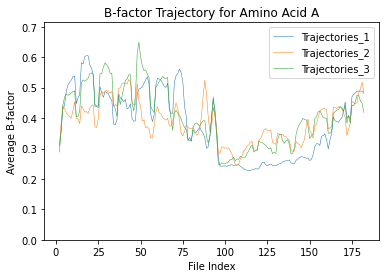

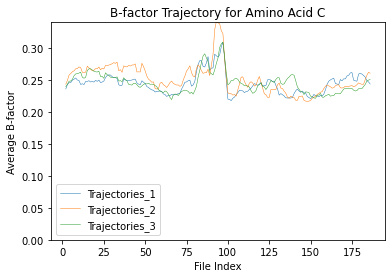

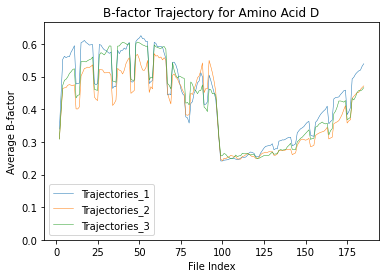

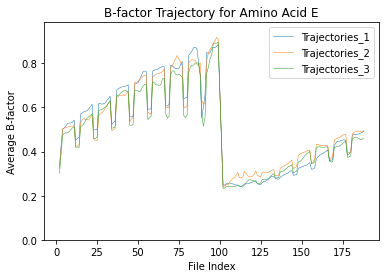

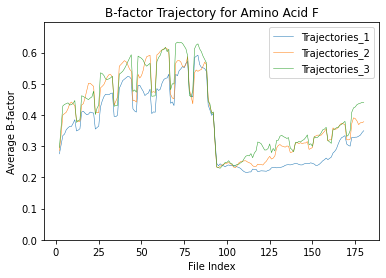

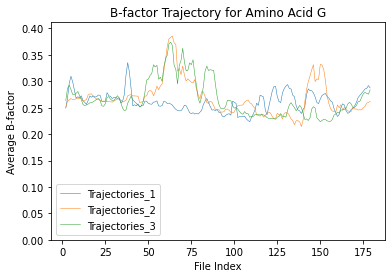

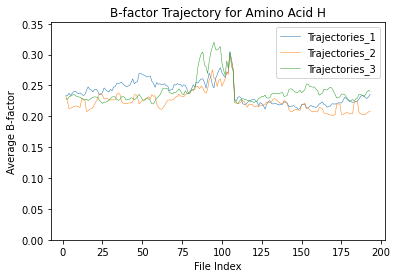

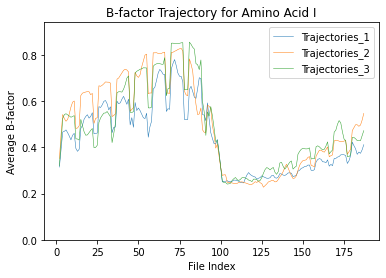

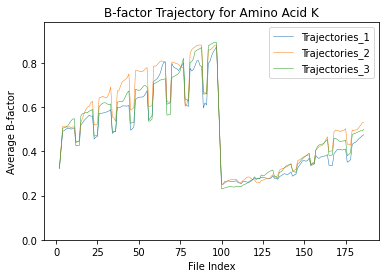

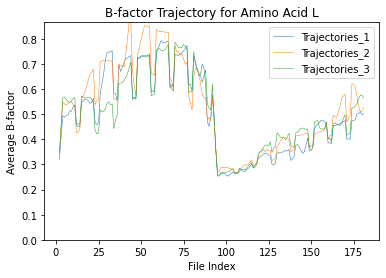

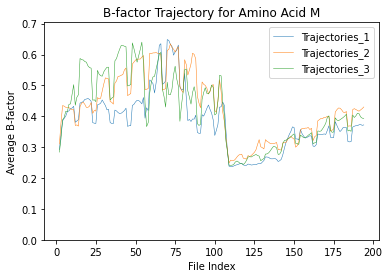

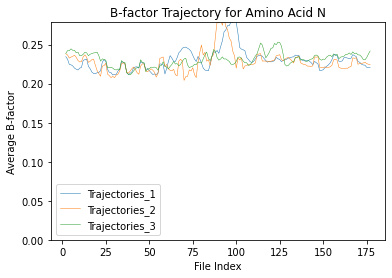

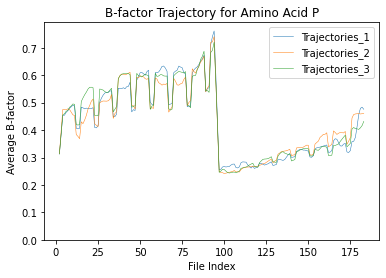

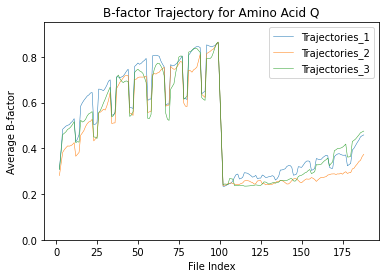

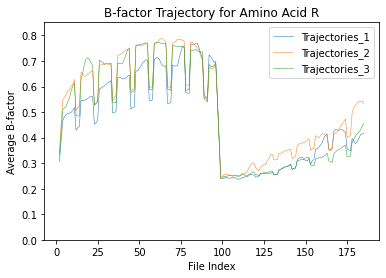

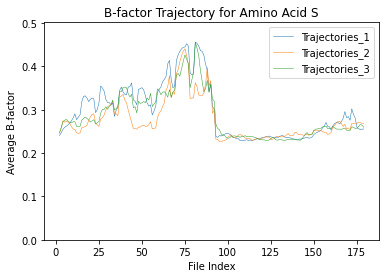

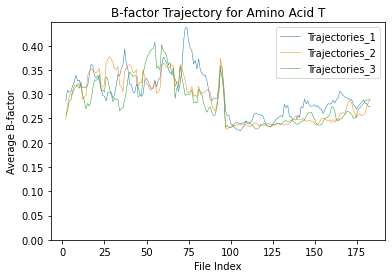

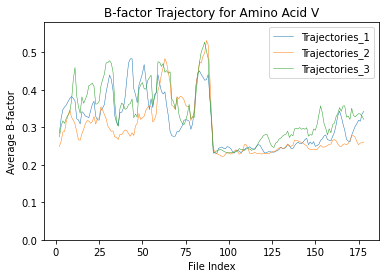

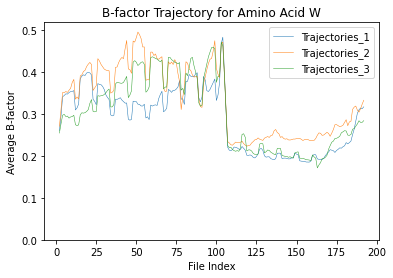

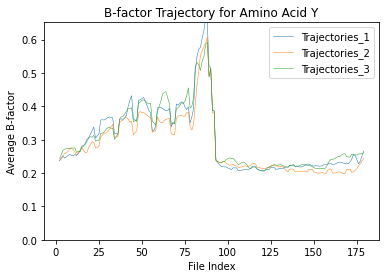

In [41]:
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectories(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        # Plot trajectories for each amino acid
        plt.figure()
        plt.title(f'B-factor Trajectory for Amino Acid {amino_acid}')
        plt.xlabel('File Index')
        plt.ylabel('Average B-factor')
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = [calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file)) for pdb_file in pdb_files]
            smoothed_factors = np.convolve(average_b_factors, np.ones(3)/3, mode='valid')
            plt.plot(range(2, len(pdb_files)), smoothed_factors, label=f'Trajectories_{i}', linewidth=0.5)
        
        # Set y-axis lower limit to 0
        plt.ylim(0, max(smoothed_factors) * 1.1)
        
        plt.legend()
        plt.show()

parent_directory = 'ESM/output_esm'
analyze_trajectories(parent_directory)


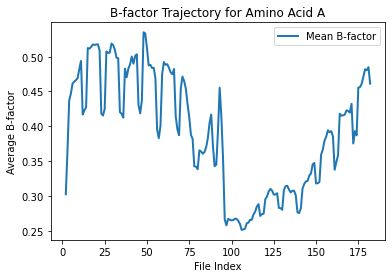

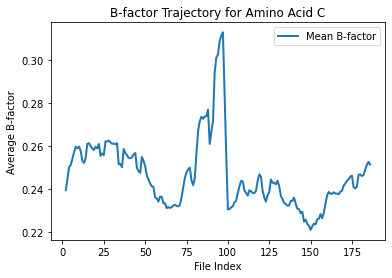

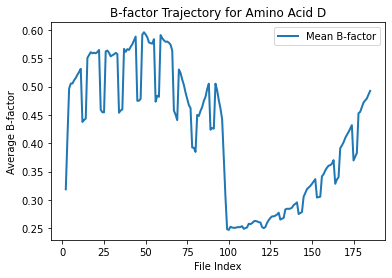

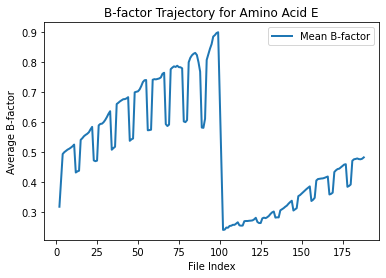

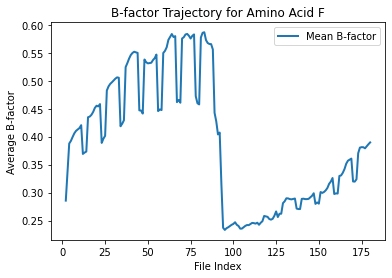

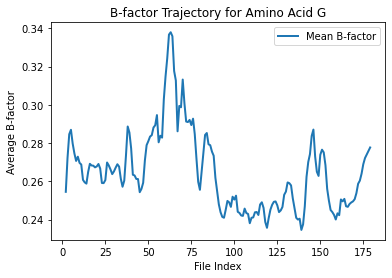

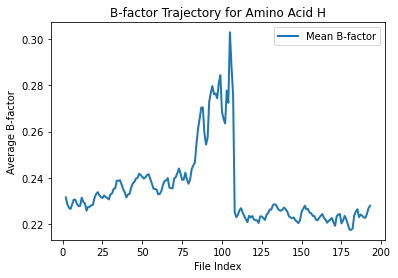

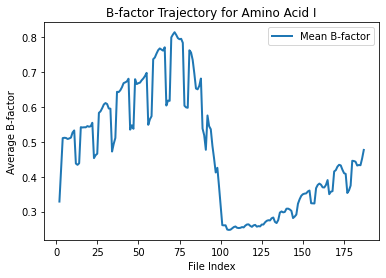

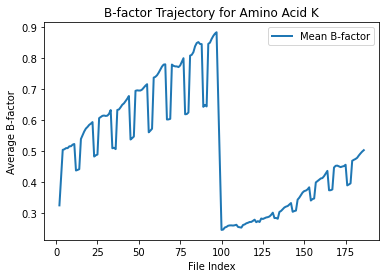

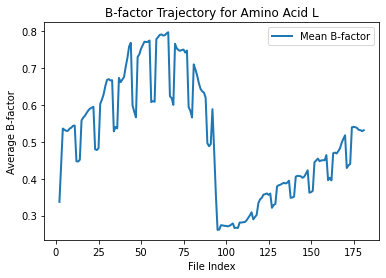

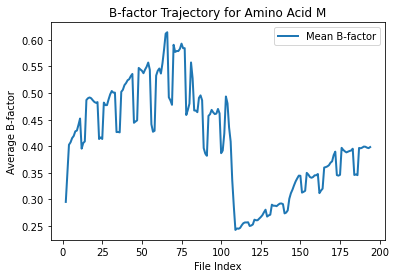

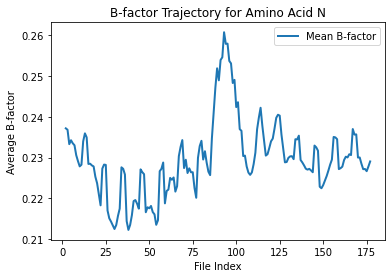

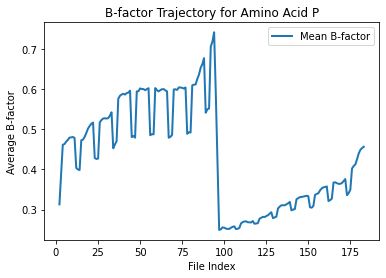

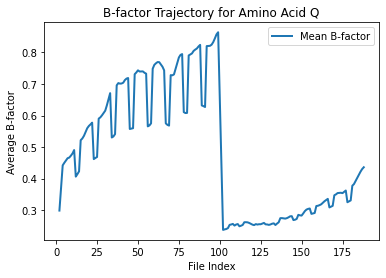

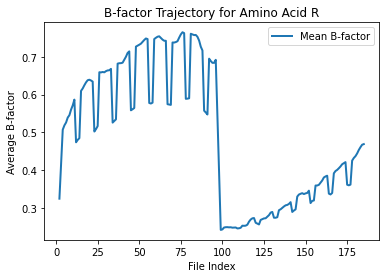

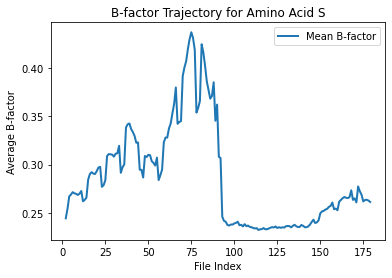

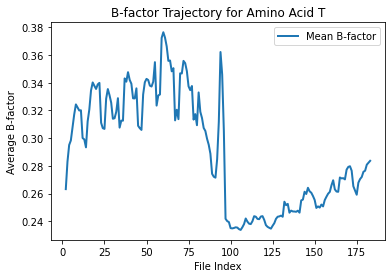

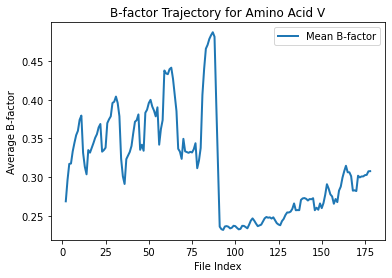

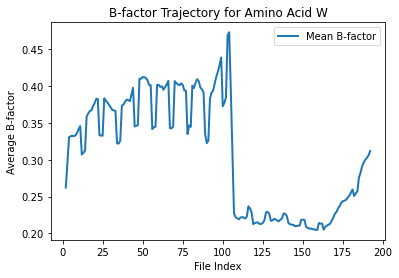

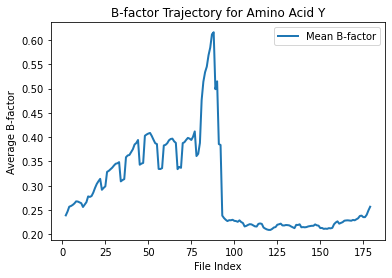

In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectories(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        # Plot trajectories for each amino acid
        plt.figure()
        plt.title(f'B-factor Trajectory for Amino Acid {amino_acid}')
        plt.xlabel('File Index')
        plt.ylabel('Average B-factor')
        
        # Accumulate average B-factors and file counts
        sum_b_factors = []  
        file_count = 0
        
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = [calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file)) for pdb_file in pdb_files]
            smoothed_factors = np.convolve(average_b_factors, np.ones(3)/3, mode='valid')
            sum_b_factors.append(smoothed_factors)
            file_count += len(pdb_files)
        
        # Calculate the mean of the accumulated B-factors
        mean_b_factors = np.mean(sum_b_factors, axis=0)
        
        # Plot the mean B-factors
        plt.plot(range(2, len(mean_b_factors) + 2), mean_b_factors, label='Mean B-factor', linewidth=2)
        
        plt.legend()
        plt.show()

parent_directory = 'ESM/output_esm'
analyze_trajectories(parent_directory)



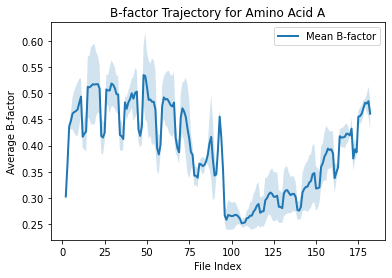

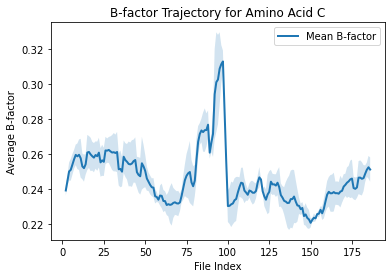

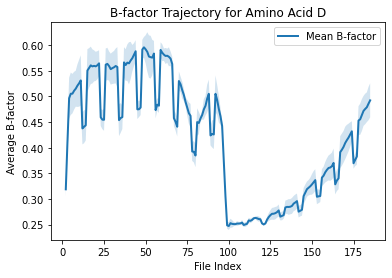

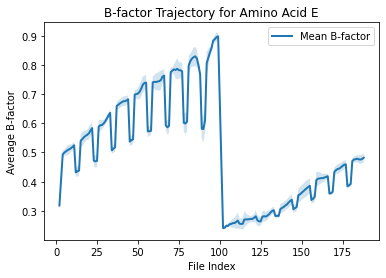

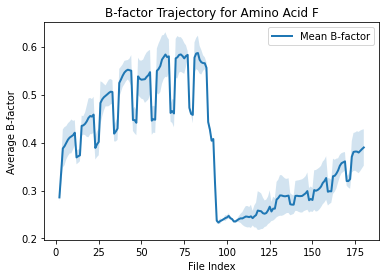

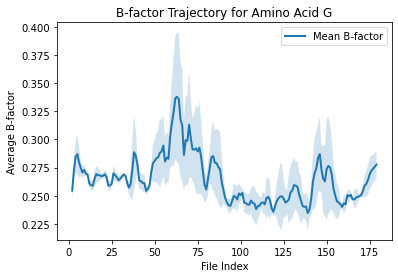

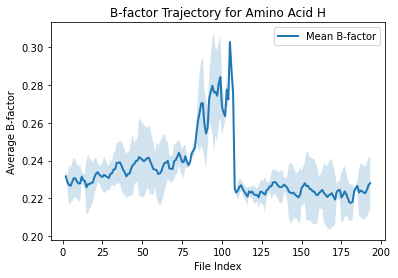

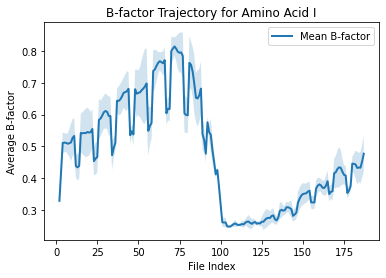

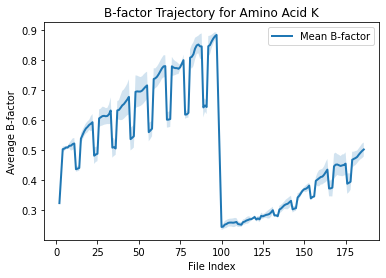

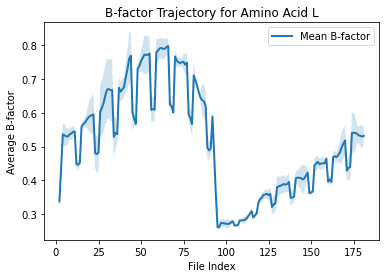

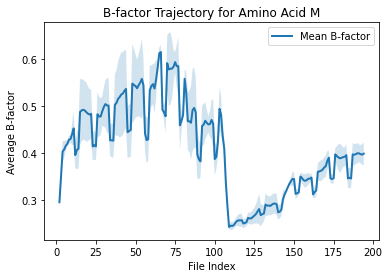

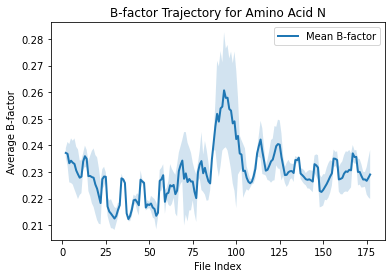

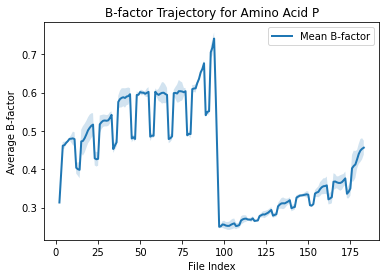

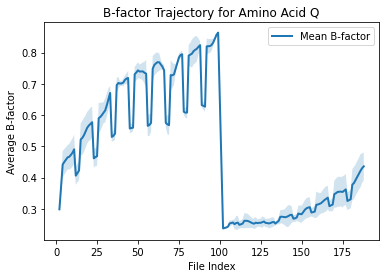

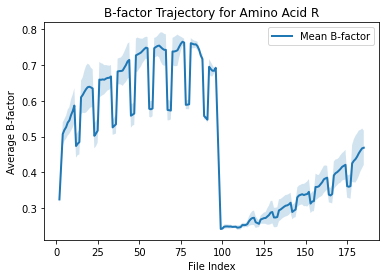

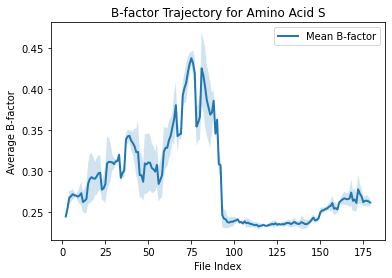

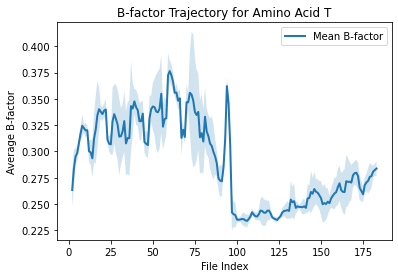

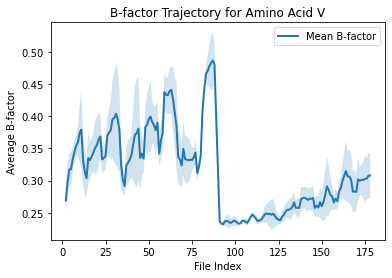

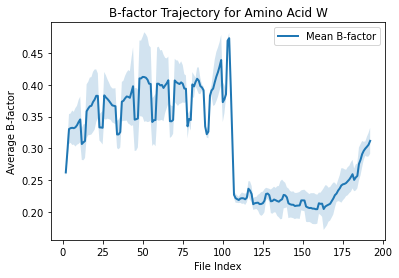

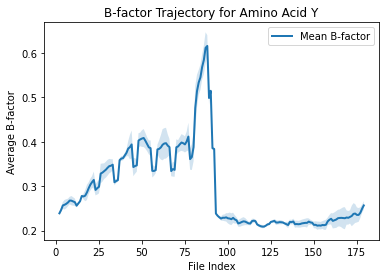

In [44]:
# THIS IS IT FOR BFACTOR
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectories(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        # Plot trajectories for each amino acid
        plt.figure()
        plt.title(f'B-factor Trajectory for Amino Acid {amino_acid}')
        plt.xlabel('File Index')
        plt.ylabel('Average B-factor')
        
        # Accumulate average B-factors and file counts
        sum_b_factors = []  
        file_count = 0
        
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = [calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file)) for pdb_file in pdb_files]
            smoothed_factors = np.convolve(average_b_factors, np.ones(3)/3, mode='valid')
            sum_b_factors.append(smoothed_factors)
            file_count += len(pdb_files)
        
        # Calculate the mean and standard deviation of the accumulated B-factors
        mean_b_factors = np.mean(sum_b_factors, axis=0)
        std_b_factors = np.std(sum_b_factors, axis=0)
        
        # Plot the mean B-factors with shaded standard deviation
        plt.plot(range(2, len(mean_b_factors) + 2), mean_b_factors, label='Mean B-factor', linewidth=2)
        plt.fill_between(range(2, len(mean_b_factors) + 2), mean_b_factors - std_b_factors, mean_b_factors + std_b_factors, alpha=0.2)
        
        plt.legend()
        plt.show()

parent_directory = 'ESM/output_esm'
analyze_trajectories(parent_directory)


In [46]:
import os
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor and standard deviation
    average_b_factor = np.mean(b_factors)
    std_b_factor = np.std(b_factors)
    return average_b_factor, std_b_factor

def save_b_factors(parent_directory, output_file):
    with open(output_file, 'w') as f:
        for amino_acid in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
            for i in range(1, 4):  # Iterate over the three subfolders
                trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
                pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
                pdb_files.sort()
                for pdb_file in pdb_files:
                    average_b_factor, std_b_factor = calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file))
                    f.write(f'{pdb_file}: Average B-factor = {average_b_factor}, Standard Deviation = {std_b_factor}\n')

parent_directory = 'ESM/output_esm'
output_file = 'ESM/bfactor/values_new.txt'
save_b_factors(parent_directory, output_file)


# Test tmscore

In [69]:
import os
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from tmtools.io import get_residue_data
from tmtools import tm_align

def calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure):
    parser = PDBParser(QUIET=True)
    tm_scores = []
    file_scores = []

    ref_structure = parser.get_structure('reference', reference_structure)
    ref_chain = next(ref_structure.get_chains())
    ref_coords, ref_seq = get_residue_data(ref_chain)

    for pdb_file in sorted(os.listdir(trajectory_directory)):
        if pdb_file.endswith(".pdb"):
            pdb_path = os.path.join(trajectory_directory, pdb_file)
            structure = parser.get_structure('PDB', pdb_path)
            chain = next(structure.get_chains())
            coords, seq = get_residue_data(chain)
            tm_result = tm_align(ref_coords, coords, ref_seq, seq)
            tm_score = tm_result.tm_norm_chain1
            tm_scores.append(tm_score)
            file_scores.append((pdb_file, tm_score))

    #print(file_scores)
    return file_scores

# Example usage
#trajectory_directory = 'ESM/output_esm/trajectories_1/'
trajectory_directory = 'ESM/plotting_test/trajectories_1/'
reference_structure = 'ESM/tmscore/ACE2.pdb'
tm_scores = calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure)


[('A_trajectory_1.fasta_0.pdb', 0.23625538188686285), ('A_trajectory_2.fasta_0.pdb', 0.2757663408811903), ('A_trajectory_3.fasta_0.pdb', 0.23648367017172095), ('A_trajectory_4.fasta_0.pdb', 0.2646611887365228), ('A_trajectory_5.fasta_0.pdb', 0.27827694954508475), ('A_trajectory_6.fasta_0.pdb', 0.25681892986415294), ('A_trajectory_7.fasta_0.pdb', 0.2529735433784424), ('A_trajectory_8.fasta_0.pdb', 0.27591599928581295), ('C_trajectory_1.fasta_0.pdb', 0.3021491232336609), ('C_trajectory_2.fasta_0.pdb', 0.28860614549136876), ('C_trajectory_3.fasta_0.pdb', 0.23919386773078175), ('C_trajectory_4.fasta_0.pdb', 0.2861927114137633), ('C_trajectory_5.fasta_0.pdb', 0.23641668507418723), ('C_trajectory_6.fasta_0.pdb', 0.25906149183477795), ('C_trajectory_7.fasta_0.pdb', 0.2765280811541346), ('C_trajectory_8.fasta_0.pdb', 0.24459323996032584), ('D_trajectory_1.fasta_0.pdb', 0.2743053674250687), ('D_trajectory_2.fasta_0.pdb', 0.2843548632709702), ('D_trajectory_3.fasta_0.pdb', 0.2580097572603705), (

In [87]:
def calculate_tm_scores_for_all_trajectories(trajectory_directories, reference_structure):
    parser = PDBParser(QUIET=True)
    all_tm_scores = []

    for i, trajectory_directory in enumerate(trajectory_directories, start=1):
        tm_scores = []
        ref_structure = parser.get_structure('reference', reference_structure)
        ref_chain = next(ref_structure.get_chains())
        ref_coords, ref_seq = get_residue_data(ref_chain)

        for pdb_file in sorted(os.listdir(trajectory_directory)):
            if pdb_file.endswith(".pdb"):
                pdb_path = os.path.join(trajectory_directory, pdb_file)
                structure = parser.get_structure('PDB', pdb_path)
                chain = next(structure.get_chains())
                coords, seq = get_residue_data(chain)
                tm_result = tm_align(ref_coords, coords, ref_seq, seq)
                tm_score = tm_result.tm_norm_chain1
                tm_scores.append((pdb_file, tm_score))

        all_tm_scores.append(tm_scores)

        # Save results to a text file
        output_file = os.path.join('ESM', 'plotting_test', f'tm_scores_{i}.txt')
        with open(output_file, 'w') as f:
            for file_name, tm_score in tm_scores:
                f.write(f'{file_name}: {tm_score}\n')

    return all_tm_scores

# Example usage
trajectory_directories = ['ESM/plotting_test/trajectories_1/', 'ESM/plotting_test/trajectories_2/', 'ESM/plotting_test/trajectories_3/']
reference_structure = 'ESM/tmscore/ACE2.pdb'
tm_scores_all_folders = calculate_tm_scores_for_all_trajectories(trajectory_directories, reference_structure)


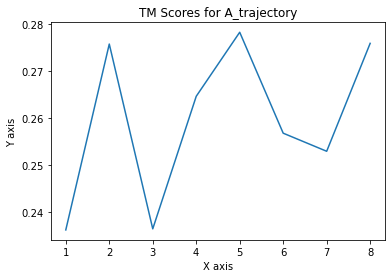

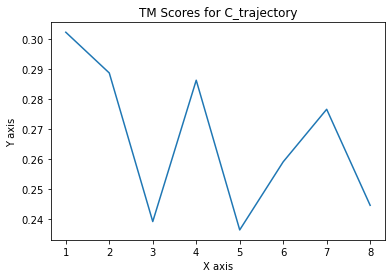

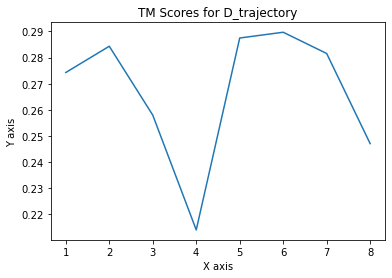

In [71]:
def sort_key(item):
    match = re.search(r'([A-Z]_trajectory)_(\d+)\.fasta_0\.pdb', item[0])
    amino_acid = match.group(1)
    trajectory_number = int(match.group(2))
    return amino_acid, trajectory_number

# Sort the list based on the custom sorting function
tm_scores.sort(key=sort_key)

# Group scores by amino acid
amino_acids = {}
for item in tm_scores:
    match = re.search(r'([A-Z]_trajectory)_(\d+)\.fasta_0\.pdb', item[0])
    amino_acid = match.group(1)
    if amino_acid not in amino_acids:
        amino_acids[amino_acid] = []
    amino_acids[amino_acid].append(item)

# Plot for each amino acid
for amino_acid, scores in amino_acids.items():
    x_values = range(1, len(scores) + 1)
    y_values = [score[1] for score in scores]
    
    plt.figure()
    plt.plot(x_values, y_values)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title(f'TM Scores for {amino_acid}')
    plt.show()

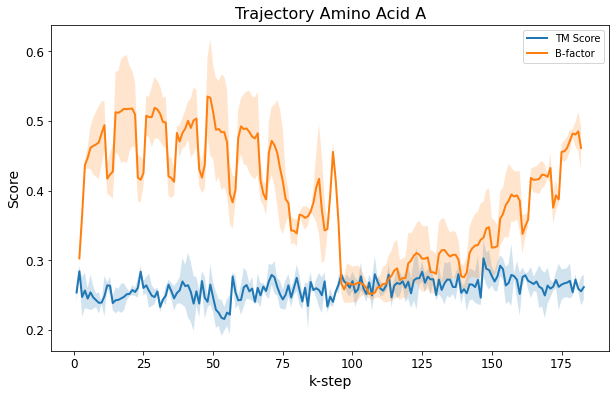

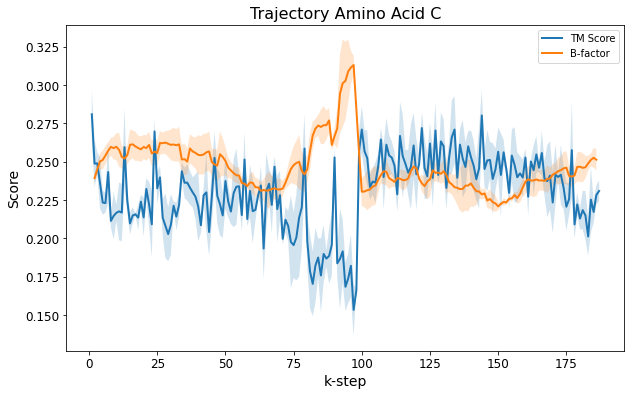

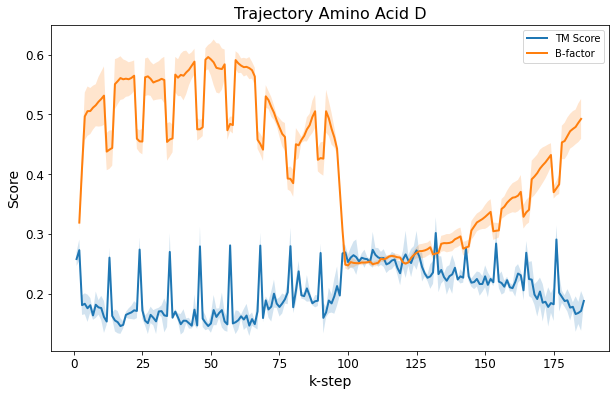

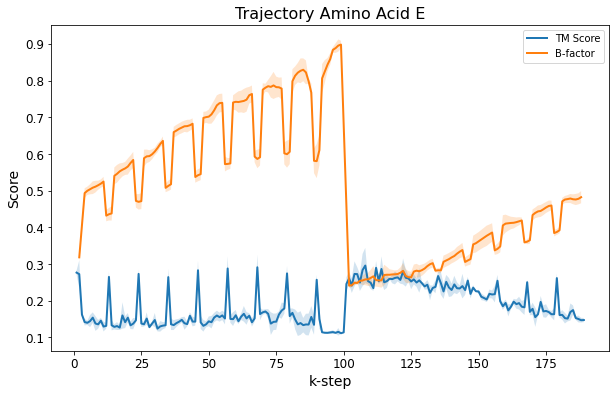

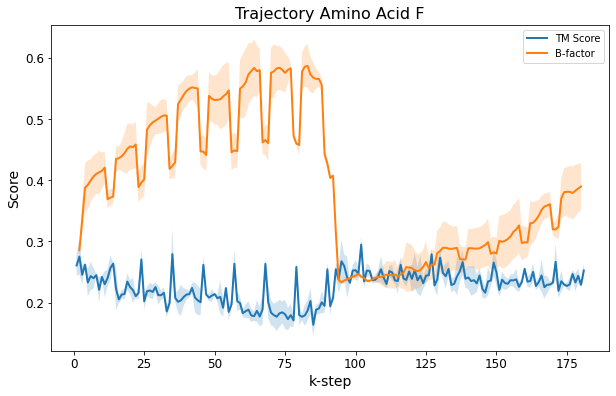

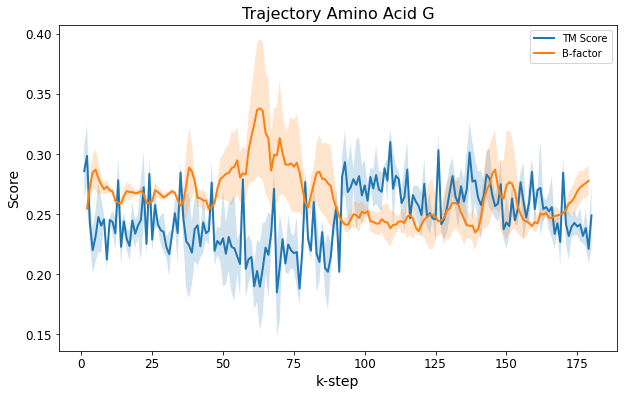

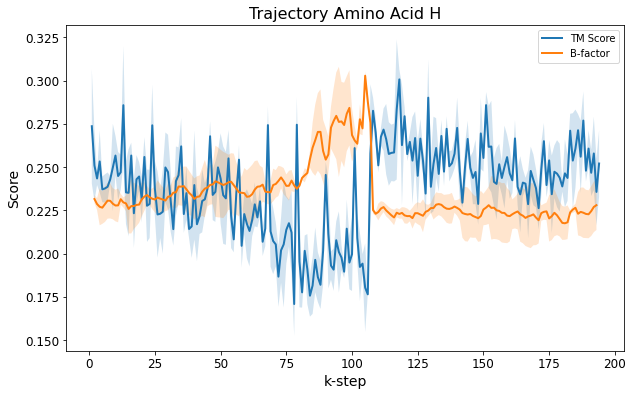

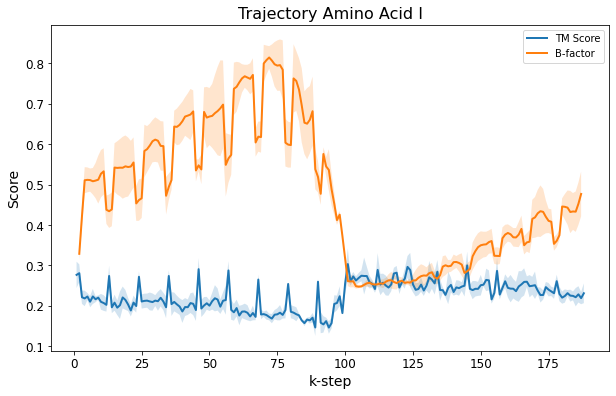

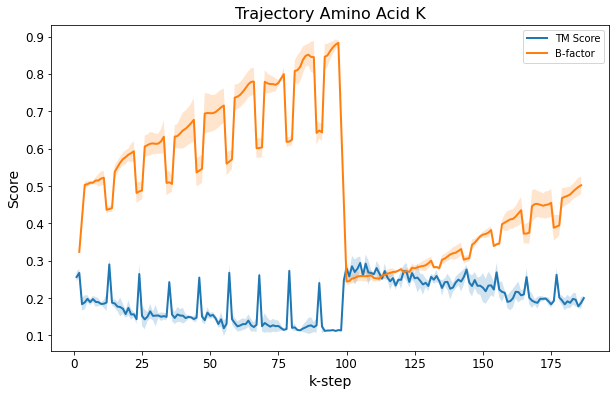

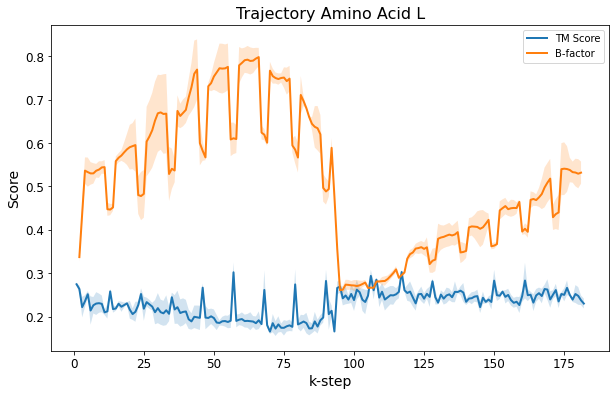

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from Bio.PDB import PDBParser
from tmtools.io import get_residue_data
from tmtools import tm_align

#################
# THIS IS IT FOR BFACTOR


def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)
    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor
#############

def calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure):
    parser = PDBParser(QUIET=True)
    tm_scores = []
    file_scores = []

    ref_structure = parser.get_structure('reference', reference_structure)
    ref_chain = next(ref_structure.get_chains())
    ref_coords, ref_seq = get_residue_data(ref_chain)

    for pdb_file in sorted(os.listdir(trajectory_directory)):
        if pdb_file.endswith(".pdb"):
            pdb_path = os.path.join(trajectory_directory, pdb_file)
            structure = parser.get_structure('PDB', pdb_path)
            chain = next(structure.get_chains())
            coords, seq = get_residue_data(chain)
            tm_result = tm_align(ref_coords, coords, ref_seq, seq)
            tm_score = tm_result.tm_norm_chain1
            tm_scores.append(tm_score)
            file_scores.append((pdb_file, tm_score))

    return file_scores

def analyze_tm_scores(parent_directory):
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in amino_acids:
        
        # Accumulate TM scores
        tm_score_lists = []

        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            tm_scores = calculate_tm_scores_for_trajectory(trajectory_directory, reference_structure)
            tm_score_lists.append([score[1] for score in tm_scores if score[0].startswith(f'{amino_acid}')])

        # Calculate mean and standard deviation
        mean_tm_scores = np.mean(tm_score_lists, axis=0)
        std_tm_scores = np.std(tm_score_lists, axis=0)

        # Plot TM scores with shaded standard deviation
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(mean_tm_scores) + 1), mean_tm_scores, label='TM Score', linewidth=2)
        plt.fill_between(range(1, len(mean_tm_scores) + 1), mean_tm_scores - std_tm_scores, mean_tm_scores + std_tm_scores, alpha=0.2)
        plt.xlabel('k-step', fontsize=14)
        plt.ylabel('Score', fontsize=14)
        plt.title(f'Trajectory Amino Acid {amino_acid}', fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        #plt.grid(True)
        plt.legend(fontsize=12)
        
        
        sum_b_factors = []  
        file_count = 0
        
        for i in range(1, 4):  # Iterate over the three subfolders
            trajectory_directory = os.path.join(parent_directory, f'trajectories_{i}')
            pdb_files = [f for f in os.listdir(trajectory_directory) if f.startswith(f'{amino_acid}') and f.endswith('.pdb')]
            pdb_files.sort()
            average_b_factors = [calculate_average_b_factor(os.path.join(trajectory_directory, pdb_file)) for pdb_file in pdb_files]
            smoothed_factors = np.convolve(average_b_factors, np.ones(3)/3, mode='valid')
            sum_b_factors.append(smoothed_factors)
            file_count += len(pdb_files)
        
        # Calculate the mean and standard deviation of the accumulated B-factors
        mean_b_factors = np.mean(sum_b_factors, axis=0)
        std_b_factors = np.std(sum_b_factors, axis=0)
        
        # Plot the mean B-factors with shaded standard deviation
        plt.plot(range(2, len(mean_b_factors) + 2), mean_b_factors, label='B-factor', linewidth=2)
        plt.fill_between(range(2, len(mean_b_factors) + 2), mean_b_factors - std_b_factors, mean_b_factors + std_b_factors, alpha=0.2)
        
        plt.legend()
        
        plt.show()

parent_directory = 'ESM/output_esm'
reference_structure = 'ESM/tmscore/ACE2.pdb'
analyze_tm_scores(parent_directory)

